### Classification using ensembles

* RandomForest
* XGBoost

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as sp
import IPython.display as ipd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score)
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, HalvingGridSearchCV

from xgboost import XGBClassifier

import utils

RANDOM_STATE = 53

In [2]:
(features, tracks) = utils.load_features()
features.shape, tracks.shape

((106574, 518), (106574, 52))

In [3]:
small = tracks[('set', 'subset')] == 'small'
medium = tracks[('set', 'subset')].isin(['small','medium'])
X = features[medium]
y = tracks[medium][('track','genre_top')]

print(X.shape, y.shape)


(25000, 518) (25000,)


In [4]:
prune = ~y.isin(['Spoken','Blues','Easy Listening'])
y = y[prune]
X = X[prune]

#### build training/test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE,
                                                    shuffle=True,
                                                    stratify=y)

### Ensembles - RandomForest

C:\Users\orovi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orovi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orovi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

          Classical       0.73      0.80      0.76       124
            Country       1.00      0.06      0.11        35
         Electronic       0.56      0.85      0.68      1263
       Experimental       0.51      0.24      0.33       450
               Folk       0.60      0.61      0.60       304
            Hip-Hop       0.80      0.43      0.56       440
       Instrumental       0.55      0.35      0.43       270
      International       0.73      0.30      0.43       204
               Jazz       1.00      0.09      0.17        77
Old-Time / Historic       0.94      0.97      0.96       102
                Pop       0.82      0.04      0.07       237
               Rock       0.69      0.87      0.77      1421
           Soul-RnB       0.00      0.00      0.00        31

           accuracy                           0.64      4958
          macro avg       0.69      0.43      0.45      4958
       weighted avg   

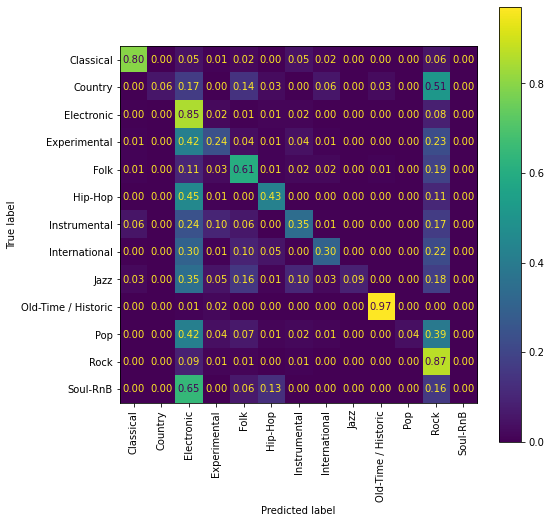

In [6]:
rfc = RandomForestClassifier(random_state=RANDOM_STATE,n_jobs=-1)
rfc.fit(X_train, y_train)

utils.run_classifier_and_report(rfc, X_test, y_test)

#### XGBoost

C:\Users\orovi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                     precision    recall  f1-score   support

          Classical       0.85      0.81      0.83       124
            Country       0.80      0.11      0.20        35
         Electronic       0.66      0.83      0.74      1263
       Experimental       0.50      0.41      0.45       450
               Folk       0.67      0.61      0.64       304
            Hip-Hop       0.76      0.62      0.69       440
       Instrumental       0.55      0.43      0.48       270
      International       0.74      0.47      0.57       204
               Jazz       0.74      0.32      0.45        77
Old-Time / Historic       0.97      0.95      0.96       102
                Pop       0.36      0.12      0.18       237
              

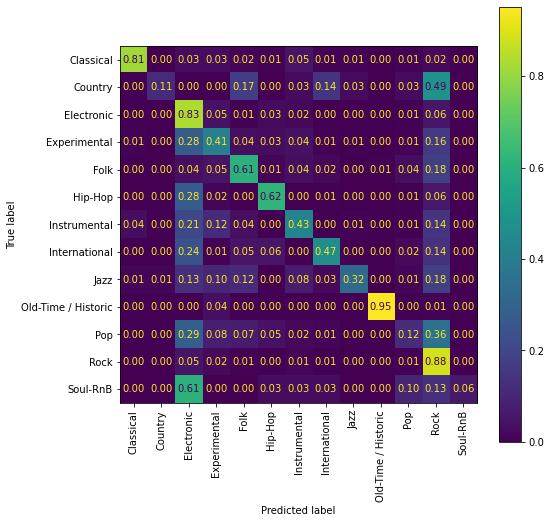

In [7]:
xgb = XGBClassifier(random_state=RANDOM_STATE, n_jobs=-1)
xgb.fit(X_train, y_train)

utils.run_classifier_and_report(xgb, X_test, y_test)

### Randomforest class-weight=balanced

C:\Users\orovi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orovi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orovi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

          Classical       0.75      0.78      0.77       124
            Country       1.00      0.03      0.06        35
         Electronic       0.56      0.84      0.67      1263
       Experimental       0.50      0.20      0.29       450
               Folk       0.64      0.60      0.62       304
            Hip-Hop       0.85      0.39      0.54       440
       Instrumental       0.55      0.42      0.47       270
      International       0.83      0.25      0.38       204
               Jazz       1.00      0.14      0.25        77
Old-Time / Historic       0.94      0.97      0.96       102
                Pop       0.75      0.04      0.07       237
               Rock       0.67      0.89      0.76      1421
           Soul-RnB       0.00      0.00      0.00        31

           accuracy                           0.63      4958
          macro avg       0.70      0.43      0.45      4958
       weighted avg   

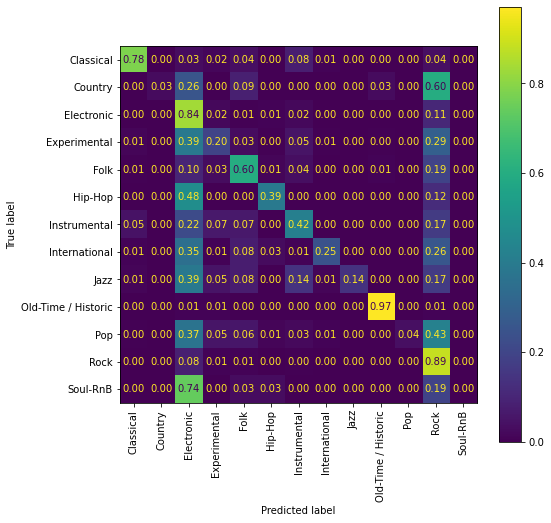

In [8]:
rfc = RandomForestClassifier(random_state=RANDOM_STATE,class_weight='balanced', n_jobs=-1)
rfc.fit(X_train, y_train)

utils.run_classifier_and_report(rfc, X_test, y_test)

### Random Forest with hyperparamater tuning

slow!!


C:\Users\orovi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 50 is smaller than n_iter=152. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=212)


C:\Users\orovi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orovi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orovi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

          Classical       0.78      0.81      0.79       124
            Country       1.00      0.06      0.11        35
         Electronic       0.56      0.83      0.67      1263
       Experimental       0.51      0.20      0.29       450
               Folk       0.66      0.61      0.63       304
            Hip-Hop       0.85      0.39      0.53       440
       Instrumental       0.54      0.40      0.46       270
      International       0.84      0.25      0.38       204
               Jazz       1.00      0.12      0.21        77
Old-Time / Historic       0.91      0.99      0.95       102
                Pop       0.82      0.04      0.07       237
               Rock       0.66      0.88      0.76      1421
           Soul-RnB       0.00      0.00      0.00        31

           accuracy                           0.63      4958
          macro avg       0.70      0.43      0.45      4958
       weighted avg   

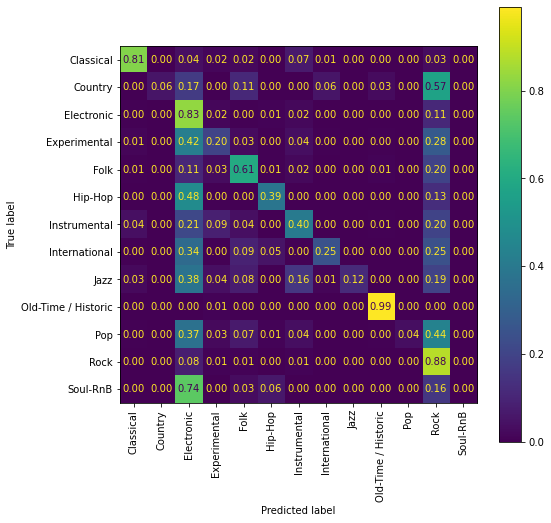

In [9]:
n_estimators = [int(x) for x in np.linspace(start = 25, stop = 400, num = 25)]
max_features = ['auto', 'sqrt']

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features}

rsv = HalvingRandomSearchCV(RandomForestClassifier(class_weight='balanced'),
                         param_distributions=param_dist,
                         scoring='f1_macro', 
                         random_state=RANDOM_STATE,
                         n_jobs=-1)

rsv.fit(X_train, y_train)

print(rsv.best_estimator_)
utils.run_classifier_and_report(rsv.best_estimator_, X_test, y_test)

### XGBOOST - balance using scale_pos_weight

C:\Users\orovi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:20] WARNING: ..\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:44:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                     precision    recall  f1-score   support

          Classical       0.85      0.81      0.83       124
            Country       0.80      0.11      0.20        35
         Electronic       0.66      0.83      0.74      1263
       Experimental       0.50      0.41      0.45       450
               Folk       0.67      0.61      0.64       304
            Hip-Hop       0.76      0.62    

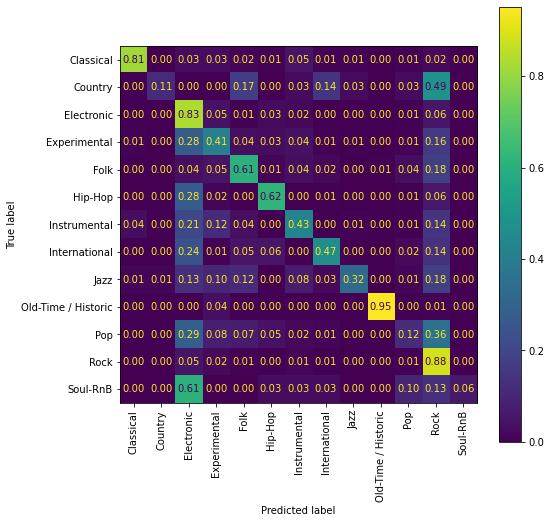

In [10]:
xgb = XGBClassifier(random_state=RANDOM_STATE, scale_pos_weight=25, n_jobs=-1)
xgb.fit(X_train, y_train)

utils.run_classifier_and_report(xgb, X_test, y_test)

### XGBOOST - hyperparamater tuning (very very slow!!)

C:\Users\orovi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:27] WARNING: ..\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:06:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.37305825085998523, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=314, n_jobs=-1, num_p

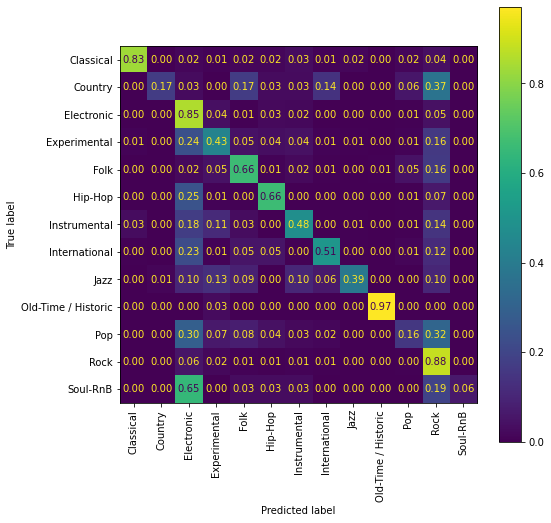

In [11]:
param_dist = {
    'learning_rate':  sp.stats.loguniform(1e-3, 1e0),
    'n_estimators': sp.stats.randint(50,500)}

rsh = HalvingRandomSearchCV(xgb,
                            param_dist, 
                            scoring='f1_macro', 
                            n_jobs=-1)
rsh.fit(X_train, y_train)
print(rsh.best_estimator_)

utils.run_classifier_and_report(rsh.best_estimator_, X_test, y_test)

# learning rate ~.305, estimators ~ 328


C:\Users\orovi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                     precision    recall  f1-score   support

          Classical       0.81      0.85      0.83       124
            Country       0.75      0.17      0.28        35
         Electronic       0.68      0.85      0.76      1263
       Experimental       0.54      0.44      0.49       450
               Folk       0.67      0.64      0.66       304
            Hip-Hop       0.77      0.65      0.71       440
       Instrumental       0.58      0.45      0.51       270
      International       0.72      0.51      0.60       204
               Jazz       0.72      0.34      0.46        77
Old-Time / Historic       0.98      0.95      0.97       102
                Pop       0.47      0.15      0.23       237
              

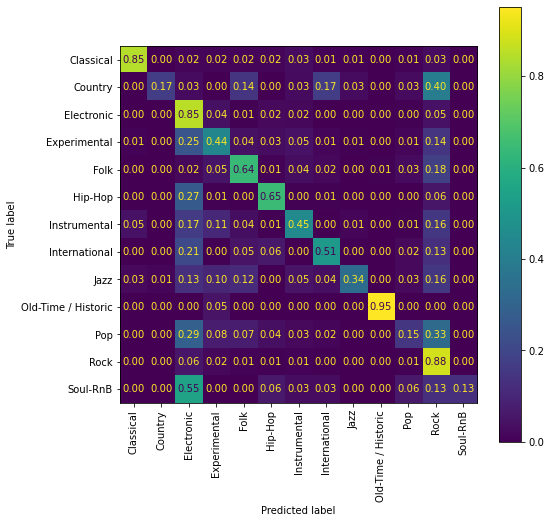

In [12]:
xgb = XGBClassifier(random_state=RANDOM_STATE, 
                    learning_rate=0.3,
                    n_estimators=325,
                    n_jobs=-1)
xgb.fit(X_train, y_train)

utils.run_classifier_and_report(xgb, X_test, y_test)